# Load and preprocess data 

In [48]:
# https://statistikguru.de/spss/rm-anova/sphaerizitaet-bestimmen.html

In [1]:
import pandas as pd
import numpy as np
# musik_listening-Subjects: 3,5,6,14,16,19,23,26,27,28
df = pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/a-Amylase_ANOVA.csv', header=1, usecols= [1,2,3,6])
df.loc[:,('sAA in U/mL')].astype(float)
df.loc[:,('Time')].astype(float)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
169    2.0
170    3.0
171    4.0
172    5.0
173    6.0
Name: Time, Length: 174, dtype: float64

In [2]:
#drop NaN
df=df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93112d5940>]],
      dtype=object)

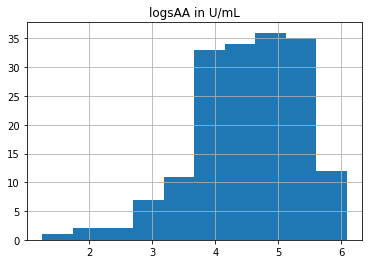

In [5]:
%matplotlib inline
df['logsAA in U/mL']=np.log(df['sAA in U/mL'])
df.hist(column='logsAA in U/mL')

In [51]:
print(df)

    Between_group_variable  Time Subject  sAA in U/mL
0                    music     1  Sub-01       184.22
1                    music     2  Sub-01       165.35
2                    music     3  Sub-01       150.45
3                    music     4  Sub-01       130.23
4                    music     5  Sub-01       198.16
..                     ...   ...     ...          ...
169                  music     2  Sub-29        76.91
170                  music     3  Sub-29        91.76
171                  music     4  Sub-29        81.79
172                  music     5  Sub-29        91.93
173                  music     6  Sub-29       187.52

[173 rows x 4 columns]


## Analysis of Amylase data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, Alpha Amylase Saliva samples seperated into two groups showed only normal distribution in one group (water) after beeing logharithmically transformed (p>0,05).


Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Bei den gemessenen a-Amylase-Werten zu zwei Bedingungen und jeweils 6 Zeitpunkten, zeigt sich innerhalb der Gruppen (Musik vs Wasser) wenn sie pro Zeiteinheit analysiert wird zu einem Großteil der Zeitpunkte eine Normalverteilung.
Im Vergleich beider Gruppen zeigt sich nur bei einer Gruppe (water) eine Normalverteilung (p>0,05).

In [14]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Between_group_variable', dv='logsAA in U/mL')

,W,pval,normal
music,0.959216,0.006896,False
water,0.970701,0.052276,True


In [58]:
# creat df containing only data of music-listening subjects
df_norm_m=df.loc[(df['Between_group_variable'] == ('music'))]
print(df_norm_m)

    Between_group_variable  Time Subject  sAA in U/mL
0                    music     1  Sub-01       184.22
1                    music     2  Sub-01       165.35
2                    music     3  Sub-01       150.45
3                    music     4  Sub-01       130.23
4                    music     5  Sub-01       198.16
..                     ...   ...     ...          ...
169                  music     2  Sub-29        76.91
170                  music     3  Sub-29        91.76
171                  music     4  Sub-29        81.79
172                  music     5  Sub-29        91.93
173                  music     6  Sub-29       187.52

[89 rows x 4 columns]


In [59]:
# check for a normally distributed sample for music listening subjects(normality)
import pingouin as pg
pg.normality(df_norm_m, group='Time', dv='sAA in U/mL')

,W,pval,normal
1,0.895291,0.080672,True
2,0.911797,0.144278,True
3,0.882290,0.051335,True
4,0.942258,0.448017,True
5,0.845471,0.014992,False
6,0.960826,0.706754,True


In [15]:
#create df containing only data of water-listening subjects
df_norm_w=df.loc[(df['Between_group_variable'] == ('water'))]
print(df_norm_w)

    Between_group_variable  Time Subject  sAA in U/mL  logsAA in U/mL
18                   water     1  Sub-04        63.95        4.158102
19                   water     2  Sub-04        95.12        4.555139
20                   water     3  Sub-04        64.15        4.161224
21                   water     4  Sub-04        35.86        3.579622
22                   water     5  Sub-04        47.52        3.861151
..                     ...   ...     ...          ...             ...
145                  water     2  Sub-25       127.51        4.848195
146                  water     3  Sub-25       284.29        5.649995
147                  water     4  Sub-25       174.47        5.161753
148                  water     5  Sub-25       251.88        5.528953
149                  water     6  Sub-25       337.52        5.821625

[84 rows x 5 columns]


In [16]:
# check for a normally distributed sample for water listening(normality)
import pingouin as pg
pg.normality(df_norm_w, group='Time', dv='sAA in U/mL')

,W,pval,normal
1,0.895888,0.098318,True
2,0.800380,0.005045,False
3,0.878419,0.055181,True
4,0.911941,0.168148,True
5,0.881941,0.061940,True
6,0.982489,0.986732,True


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05).

Homogenität des Varianzen ist gegeben (sowohl innerhalb der Gruppen, als auch über die Gruppen hinweg

Homogenität der Fehlervarianzen zwischen den Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [62]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_w, group='Time', dv='sAA in U/mL')

,W,pval,equal_var
levene,0.917,0.474261,True


In [63]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_m, group='Time', dv='sAA in U/mL')

,W,pval,equal_var
levene,1.26,0.288939,True


In [64]:
pg.homoscedasticity(df, group='Time', dv='sAA in U/mL')

,W,pval,equal_var
levene,1.921,0.093362,True


Sphärizität liegt nicht vor. In der späteren ANOVA wird deswegen eine Korrektur der p-Wertes nach Greenhouse Geisser vorgenommen.

In [8]:
pg.sphericity(df, subject='Subject', dv='sAA in U/mL', within='Time')

(False, 0.221, 37.849, 14, 0.0005753258228049843)

# Descriptive statistics


[]

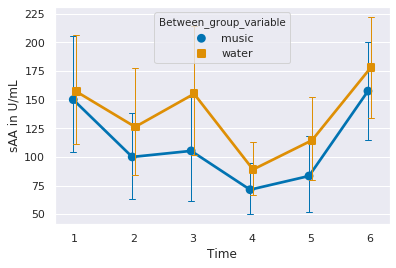

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.pointplot(data=df, x='Time', y='sAA in U/mL', hue='Between_group_variable', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.plot()

über die Zeitpunkte 3-5 (Zeit von Beginn der akustischen Intervention(3), über Ende der akustischen Intervention(4), bis zum Ende des zweiten Stresstests(5)

In [68]:
df.groupby(['Time', 'Between_group_variable'])['sAA in U/mL'].agg(['mean', 'std']).round(2)

mean     std
Time Between_group_variable                
1    music                   149.99  104.96
     water                   157.14   95.79
2    music                    99.97   78.90
     water                   126.20   95.94
3    music                   105.25   92.20
     water                   155.09  110.91
4    music                    71.36   43.40
     water                    88.98   45.79
5    music                    83.33   71.30
     water                   114.50   72.03
6    music                   157.50   89.63
     water                   178.14   85.98

# Conduct a mixed (split-plot) ANOVA with Greenhouse-Geisser corrected p-values
no significant Interaction detected --> no post-hoc tests
The Greenhouse–Geisser adjustment was used to correct for violations of sphericity.
There was no statistically significant interaction between time and group, Greenhouse–Geisser punc = 0,674, GG p=1,819, eps=0,732.

Da eine Verletzung der Voraussetzung der Sphärizität vorlag, wurde eine Greenhouse–Geisser Korrektur der Freiheitsgrade vorgenommen.

Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen (punc=0,674, Greenhouse–Geisser p= 1,819, eps=0,73) .

In [10]:
# https://github.com/raphaelvallat/pingouin/blob/master/notebooks/01_ANOVA.ipynb
# https://raphaelvallat.com/pingouin.html
#  dv:  A dependent variable: Cortisol
#  within: A within-group variable, Time
#  between:  A between-group variable, Group, with two levels (music, water)
#  subject:  A subject variable, Subject


import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='sAA in U/mL', within='Time', between='Between_group_variable', subject='Subject', data=df, correction=True)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source                          SS    DF1    DF2         MS       F    p-unc  p-GG-corr                 np2  eps    sphericity    W-spher    p-spher
----------------------  ----------  -----  -----  ---------  ------  -------  ----------------------  -----  -----  ------------  ---------  ---------------------
Between_group_variable   26996.227      1     27  26996.227   0.923    0.345  -                       0.033  -      -             -          -
Time                    157308.256      5    135  31461.651  11.539    0.000  1.8191940108565886e-07  0.299  0.732  False         0.176      7.494074639949745e-05
Interaction               8640.444      5    135   1728.089   0.634    0.674  -                       0.023  -      -             -          -

